<a href="https://colab.research.google.com/github/ms0753/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
plt.rc('font', family='NanumBarunGothic')

In [3]:
edu_data = pd.read_csv('/content/user_db1.csv')
edu_data.head()

,user_id,gender,area,age,access_media,group,discounted
0,78ff837c7cea9f33,남,송파구,20,인스타그램,1,10000.0
1,2987aa87d23c9e3d,남,강서구,30,검색,1,30000.0
2,23182525e9996864,남,도봉구,20,인스타그램,1,20000.0
3,ffb6913842d617a5,여,용산구,20,인스타그램,1,20000.0
4,2c6822e7e833dc95,여,은평구,30,네이버,1,30000.0


In [4]:
edu_data.isnull().sum()

,0
user_id,0
gender,0
area,0
age,0
access_media,0
group,0
discounted,2474


In [5]:
edu_data = edu_data.dropna()

In [6]:
access_media = edu_data.groupby('access_media')['user_id'].count()
access_media

,user_id
access_media,
검색,537
네이버,884
에브리타임,547
오프라인 광고,260
인스타그램,1711
지인추천,566
페이스북,1149


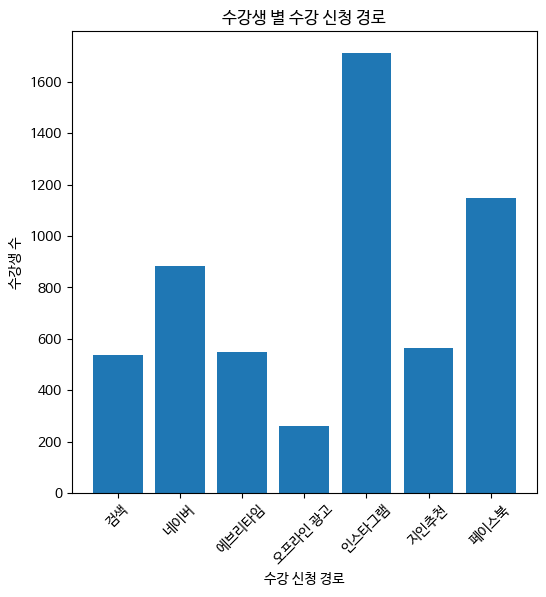

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family = 'NanumBarunGothic')

plt.figure(figsize=(6,6))
plt.bar(access_media.index, access_media.values)
plt.title('수강생 별 수강 신청 경로')
plt.xlabel('수강 신청 경로')
plt.ylabel('수강생 수')

# x축 눈금의 글씨를 45도 회전
plt.xticks(rotation=45)
plt.show()

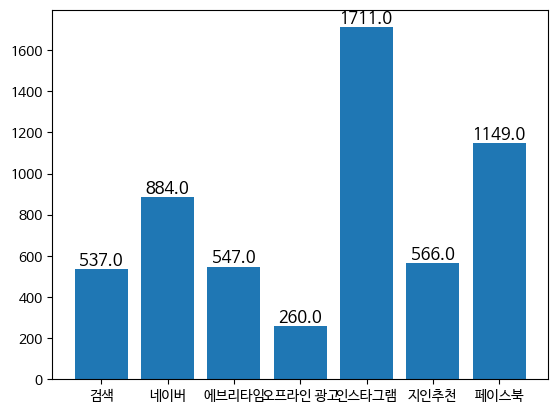

In [12]:
bar = plt.bar(access_media.index, access_media.values)
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

<BarContainer object of 7 artists>

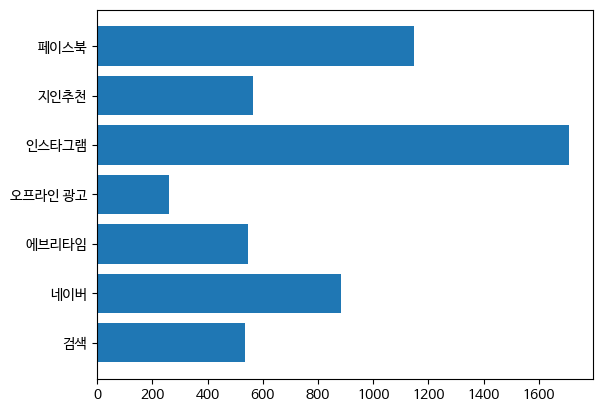

In [13]:
plt.barh(access_media.index, access_media.values)

In [18]:
student_data = pd.read_table('/content/user_registered_class.csv', sep=',')
student_data.head()

,user_id,web,app,sql,web.1
0,78ff837c7cea9f33,0,0,0,NaN
1,2987aa87d23c9e3d,0,0,0,NaN
2,23182525e9996864,1,1,1,NaN
3,ffb6913842d617a5,0,0,0,NaN
4,2c6822e7e833dc95,0,0,0,NaN


In [27]:
sum_of_students_by_class = student_data[student_data==1].count()
sum_of_students_by_class

,0
user_id,0
web,597
app,1005
sql,252
web.1,0


In [28]:
sum_of_students_by_class = sum_of_students_by_class.drop('user_id')
sum_of_students_by_class

,0
web,597
app,1005
sql,252
web.1,0


In [29]:
sum_of_students_by_class = sum_of_students_by_class.drop('web.1')
sum_of_students_by_class

,0
web,597
app,1005
sql,252


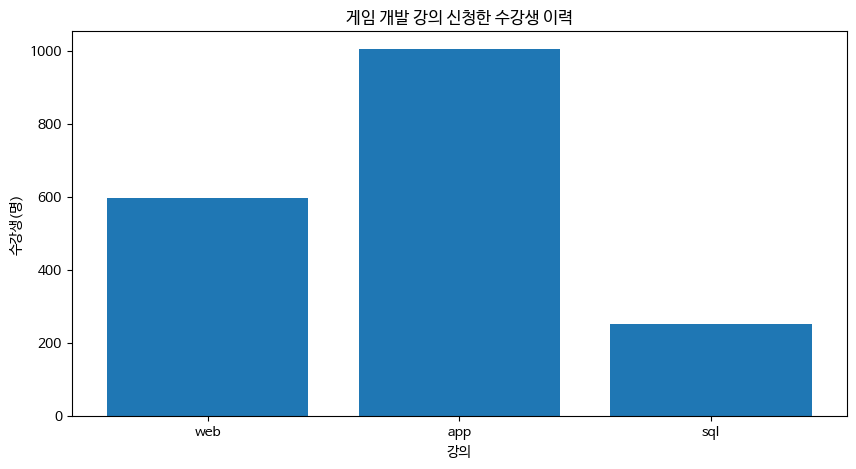

In [30]:
plt.figure(figsize=(10,5))
plt.bar(sum_of_students_by_class.index, sum_of_students_by_class.values)
plt.title('게임 개발 강의 신청한 수강생 이력')
plt.xlabel('강의')
plt.ylabel('수강생(명)')
plt.show()

In [31]:
app_data = pd.read_table('/content/user_db_app.csv', sep=',')
game_data = pd.read_table('/content/user_db_game.csv', sep=',')
app_data.head()

,user_id,gender,area,age,access_media,goal
0,1a8adcf53f881ee8,남,송파구,20,인스타그램,아이디어 실현
1,bfd8847e1257757f,남,강서구,30,검색,부수입 창출
2,f4445dcb39d1bc54,남,도봉구,20,인스타그램,부수입 창출
3,75ac4eb719d64179,여,용산구,20,인스타그램,업무효율
4,f258561fb134f6fd,여,은평구,30,네이버,문제해결


In [32]:
app_users_goal = app_data.groupby('goal')['user_id'].count()
app_users_goal

,user_id
goal,
리서치 능력,46
문제해결,95
부수입 창출,400
아이디어 실현,140
업무효율,104
의사결정,215


In [33]:
game_users_goal = game_data.groupby('goal')['user_id'].count()
game_users_goal

,user_id
goal,
리서치 능력,50
문제해결,70
부수입 창출,440
아이디어 실현,140
업무효율,85
의사결정,215


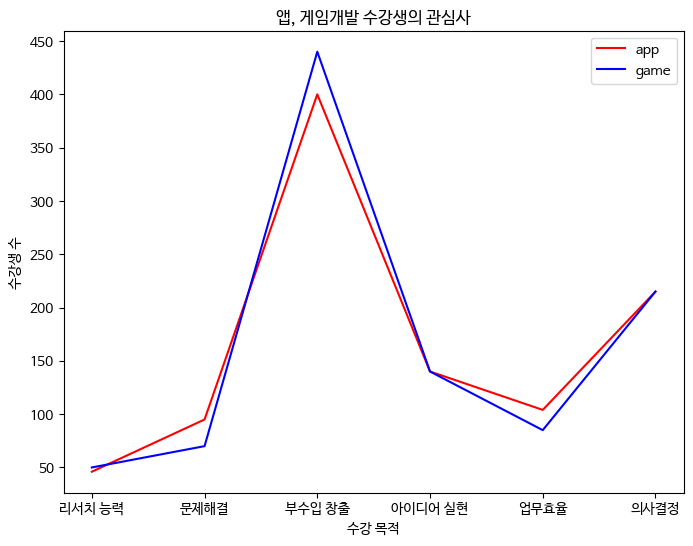

In [34]:
plt.figure(figsize=(8,6))
plt.plot(app_users_goal.index, app_users_goal.values, color="red", label="app")
plt.plot(game_users_goal.index, game_users_goal.values, color="blue", label="game")
plt.legend()
plt.title("앱, 게임개발 수강생의 관심사")
plt.xlabel('수강 목적')
plt.ylabel('수강생 수')
plt.show()

In [38]:
discount_data = pd.read_table('/content/user_db1.csv', sep=',')
sum_of_students_by_discounted = discount_data[discount_data['group']==1]['user_id'].count()
sum_of_students_by_discounted

5654

In [39]:
sum_of_students_by_not_discounted = discount_data[discount_data['group']==0]['user_id'].count()
sum_of_students_by_not_discounted

2474

In [40]:
percent_of_students_by_not_discounted = sum_of_students_by_not_discounted/12000 * 100
percent_of_students_by_discounted = sum_of_students_by_discounted/12000 * 100
print(percent_of_students_by_not_discounted, percent_of_students_by_discounted)

20.616666666666667 47.11666666666667


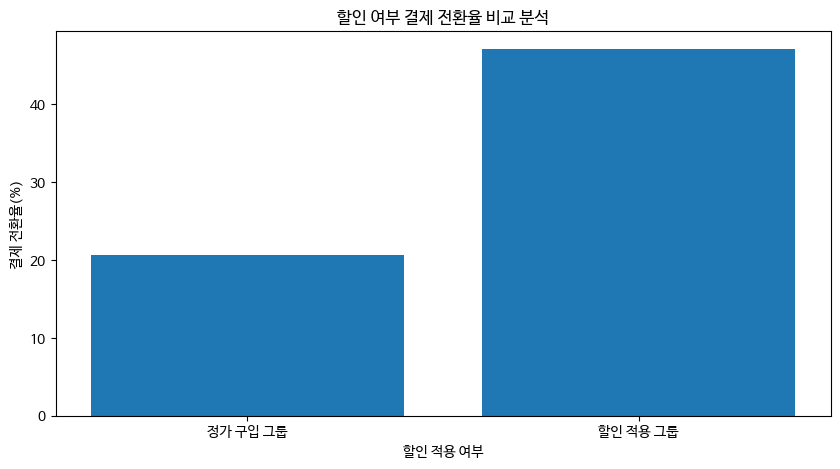

In [41]:
plt.figure(figsize=(10,5))
x_list = ["정가 구입 그룹", "할인 적용 그룹"]
y_list = [percent_of_students_by_not_discounted, percent_of_students_by_discounted]
plt.bar(x_list, y_list)
plt.title('할인 여부 결제 전환율 비교 분석')
plt.xlabel('할인 적용 여부')
plt.ylabel('결제 전환율(%)')
plt.show()

In [42]:
students_discounted = discount_data.groupby('discounted')['user_id'].count()
students_discounted

,user_id
discounted,
10000.0,808
20000.0,1588
30000.0,3258


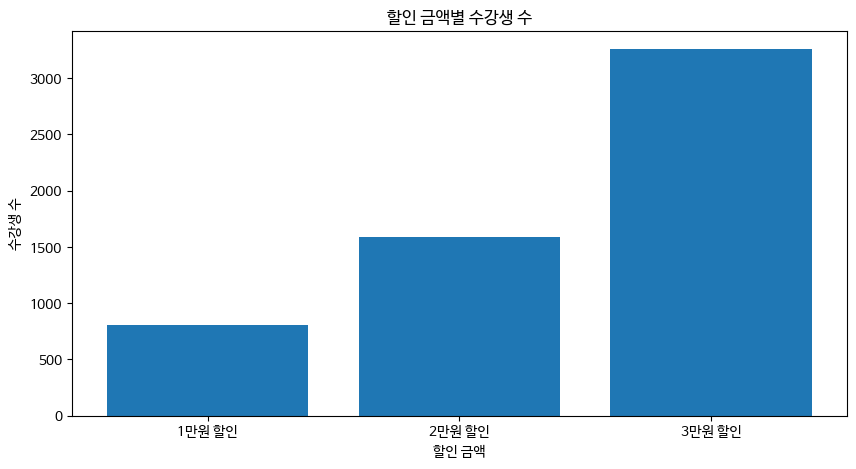

In [43]:
plt.figure(figsize=(10,5))
x_list = ["1만원 할인", "2만원 할인", "3만원 할인"]
plt.bar(x_list, students_discounted.values)
plt.title('할인 금액별 수강생 수')
plt.xlabel('할인 금액')
plt.ylabel('수강생 수')
plt.show()